# Demo for generating complete LUTs from partial input



In [1]:
from cana.drawing.schema_vis import plot_schemata
from cana.drawing.plot_look_up_table import plot_look_up_table
from cana.utils import fill_out_lut

from cana.boolean_network import BooleanNetwork
from cana.boolean_node import BooleanNode

In [2]:
from cana.datasets.bio import THALIANA

thaliana = THALIANA()

thaliana.nodes[0].look_up_table()

,In:,Out:
0,0000000,0
1,0000001,0
2,0000010,0
3,0000011,0
4,0000100,0
...,...,...
123,1111011,1
124,1111100,1
125,1111101,1
126,1111110,1


## Partial LUTs

These are incomplete effective graphs with '-' signifying the wildcard symbol. Visually inspecting an effective graph doesn't allow us to infer its status of completeness or identify any inherent contradictions within the inputs.

The fill_out_lut() function enables us to check for contradictory output data. The contradictory outputs are marked by '!'

The fill_out_lut() function also checks for missing rules in the LUT, allowing us to correct out data infered from sources and explore state spaces yet to be understood.  These outputs are marked by '?'.

In [3]:
# Using the fill_out_lut function found in utils.py

# example look up tables
partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")],
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1---", "0")],
]
generated_lut = fill_out_lut(partial_luts[3])
generated_lut

[('0000', '?'),
 ('0001', '?'),
 ('0010', '?'),
 ('0011', '?'),
 ('0100', '?'),
 ('0101', '?'),
 ('0110', '?'),
 ('0111', '?'),
 ('1000', '0'),
 ('1001', '0'),
 ('1010', '0'),
 ('1011', '0'),
 ('1100', '0'),
 ('1101', '0'),
 ('1110', '0'),
 ('1111', '0')]

## Partial LUTs in BNS (.cnet) format

BNS is a software tool for computing attractors in Boolean Networks with Synchronous update. Synchronous Boolean networks are used for the modeling of genetic regulatory networks.

BNS reads in a Boolean network description represented in a .cnet format similar to the Berkeley Logic Interchange Format (BLIF) format commonly used in synthesis and verification tools and prints out the set of network's attractors.

Check: <https://people.kth.se/~dubrova/bns.html>

<BNode(id=2, name='FUL', k=2, inputs=[4,12], state='0', outputs=[1,?,?,?] constant=False)>
  In: Out:
0  00    1
1  01    ?
2  10    ?
3  11    ?


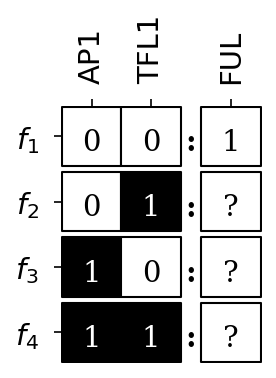

In [4]:
partial_luts_network = BooleanNetwork.from_file(
    "partial_LUT_demo_nodes.txt",  # loading example network with partial LUTs in the nodes
    name="Partial LUTs Demo",
    keep_constants=True,
    partial_lut=True,  # specifying that the LUTs are partial, because the default assumes that all LUTs are complete
)


node = partial_luts_network.nodes[2]

print(node)
print(node.look_up_table())
# print(node.schemata_look_up_table())  # This will throw an error as the presence of '?' makes it impossible to generate a schemata look up table.

plot_look_up_table(node)
# plot_schemata(node)  # This will throw an error as the presence of '?' makes it impossible to generate a schemata look up table.

## Instantiating a BooleanNode object using partial LUT

Incorporating the fill_out_lut() function into the instantiation of a single boolean node object under the class BooleanNode, this object will now contain '?' for unspecified output values in the LUT entry. 


In [5]:
# example partial look up tables
partial_luts = [
    [("001-", "0"), ("1--1", "1"), ("11--", "1")],
    [("00--", "0"), ("1--1", "1"), ("110-", "1")],
    [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")],  # will have clashes
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "?")],
    [("-1--", "0")],
    [("-1--", "1")],
    [("-1--", "?")],
]

# using the from_partial_lut function found in BooleanNode class
for partial_lut in partial_luts:
    generated_node = BooleanNode.from_partial_lut(partial_lut)
    # print(generated_node)
    print(generated_node.outputs)
    # plot_look_up_table(generated_node)
    # plot_schemata(generated_node)  # This will throw an error as the presence of '?' makes it impossible to generate a schemata look up table.

['?', '?', '0', '0', '?', '?', '?', '?', '?', '1', '?', '1', '1', '1', '1', '1']
['0', '0', '0', '0', '?', '?', '?', '?', '?', '1', '?', '1', '1', '1', '?', '1']
Clashing output values for entry: 101
Clashing output values for entry: 011
['?', '?', '1', '!', '1', '!', '1', '1']
['0', '?', '0', '1', '0', '?', '0', '1', '?', '0', '?', '0', '?', '0', '?', '0']
['?', '?', '?', '?', '?', '1', '0', '1', '?', '1', '0', '0', '?', '1', '0', '0']
['?', '?', '?', '?', '?', '?', '0', '?', '?', '1', '0', '0', '?', '1', '0', '0']
['?', '?', '?', '?', '0', '0', '0', '0', '?', '?', '?', '?', '0', '0', '0', '0']
['?', '?', '?', '?', '1', '1', '1', '1', '?', '?', '?', '?', '1', '1', '1', '1']
['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


## Generating missing output values randomly

In [6]:
# filling missing output values randomly with 1 or 0 instead of '?'
partial_lut = [("1-01", "1"), ("1-1-", "0"), ("01--", "0")]
generated_node = BooleanNode.from_partial_lut(
    partial_lut, fill_missing_output_randomly=True
)
print(generated_node)
print(generated_node.outputs)

<BNode(id=0, name='x', k=4, inputs=[1,2,3,4], state='0', outputs=[0,1,1,0...1,1,0,0] constant=False)>
['0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0']


## Generating LUT with specified Node Bias

The BooleanNode object calculates the node bias using the .bias() function. 

```python
generated_node.bias()
```


In [7]:
partial_luts = [
    [("001-", "0"), ("1--1", "1"), ("11--", "1")],
    [("00--", "0"), ("1--1", "1"), ("110-", "1")],
    # [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")], # will have clashes
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "?")],
    [("-1--", "0")],
    [("-10-", "1")],
    [("11-", "?")],
]


for lut in partial_luts:
    node = None
    # generated_node_permutations = None
    node = BooleanNode.from_partial_lut(lut)
    # print(node.outputs)

    generated_node_permutations = node.generate_with_required_bias(
        required_node_bias=0.5, limit=50, verbose=True
    )
    # print(generated_node_permuations[0].outputs, "\n")

28 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
35 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
1 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
35 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
84 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
1 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
495 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
70 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.


In [8]:
node = next(generated_node_permutations)
node.outputs

['1', '1', '0', '0', '0', '0', '1', '1']

## Generating LUT with specified Effective connectivity

The BooleanNode object calculates effective connectivity using the .effective_connectivity() function.

```python

generated_node.effective_connectivity()

```
        

Generating a Look Up Table for a node with a specified effective connectivity. 

In [9]:
partial_luts = [
    [("001-", "0"), ("1--1", "1"), ("11--", "1")],
    [("00--", "0"), ("1--1", "1"), ("110-", "1")],
    # [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")], # will have clashes
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "?")],
    [("-1--", "0")],
    [("-1--", "1")],
    # [("-1--","?")]
]
partial_lut = partial_luts[0]

for partial_lut in partial_luts:
    generated_nodes = BooleanNode.from_partial_lut(partial_lut)
    print(f"Partial LUT: {generated_nodes.outputs}")
    generated_node_permuations = (
        generated_nodes.generate_with_required_effective_connectivity(
            required_effective_connectivity=0.49, verbose=True
        )
    )
    print(generated_node_permuations.outputs, "\n")


# # Incorporating the above functions into the from_partial_lut() under BooleanNode class
# generated_node = BooleanNode.from_partial_lut(
#     partial_lut, required_effective_connectivity=0.45
# )

# plot_look_up_table(generated_node)
# plot_schemata(generated_node)

Partial LUT: ['?', '?', '0', '0', '?', '?', '?', '?', '?', '1', '?', '1', '1', '1', '1', '1']
Generated the node with the closest possible effective connectivity of 0.484375.
['0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1'] 

Partial LUT: ['0', '0', '0', '0', '?', '?', '?', '?', '?', '1', '?', '1', '1', '1', '?', '1']
Generated the node with the closest possible effective connectivity of 0.484375.
['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1'] 

Partial LUT: ['0', '?', '0', '1', '0', '?', '0', '1', '?', '0', '?', '0', '?', '0', '?', '0']
Generated the node with the closest possible effective connectivity of 0.484375.
['0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0'] 

Partial LUT: ['?', '?', '?', '?', '?', '1', '0', '1', '?', '1', '0', '0', '?', '1', '0', '0']
Generated the node with the closest possible effective connectivity of 0.484375.
['1', '1', '1', '0', '1', '1', '0', '1', '1', '1', 

## Note: 

from_partial_lut() will throw an error if there are mutliple kwargs inputted. 

```python
generated_node = BooleanNode.from_partial_lut(partial_lut, fill_missing_output_randomly= True, required_effective_connectivity=0.7, required_node_bias=0.5)

ValueError: Only one of required_effective_connectvity, required_node_bias and fill_missing_output_randomly can be True. Please set the rest to False.
```